# Red Wine - Clustering

## Import Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
sns.set(context='notebook', palette='dark', color_codes=True)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Import Dataset
Dataset was already preprocessed and checked on previous script, then there is no need to inspect the values.

In [3]:
df_red_wine = pd.read_csv("data/red_wine_preprocessed.csv", sep=';')
df_red_wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


## Clustering
Objective is to group Red wines in Clusters to practice the technique and verify how the red wines cluster themselves into differente groups.

First it is necessary to standardize the data:

In [4]:
df_std = StandardScaler().fit_transform(df_red_wine)

Data will be clustered by K-means by measuring euclidean distance.

Number of clusters will vary from 1 to 20 in order to perform the Elbow plot.

In [5]:
n_clusters_interval = list(range(1,21))

models = []
wss = []
sil_score = []

for n_clusters in n_clusters_interval:
    # Fitting without Quality
    model = KMeans(n_clusters = n_clusters, random_state=42, algorithm = 'full').fit(df_std)
    models.append(model)
    wss.append(model.inertia_)
    
    if n_clusters == 1:
        sil_score.append(0)
    else:
        sil_score.append(silhouette_score(df_std, model.labels_, metric='euclidean'))


Elbow Plot

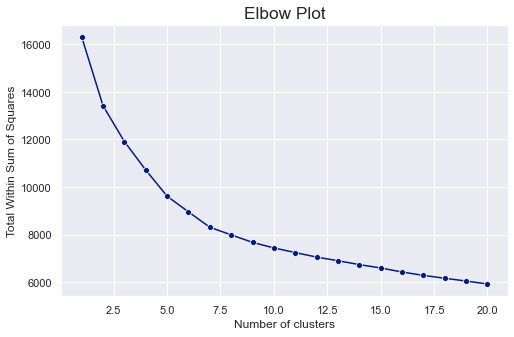

In [6]:
plt.figure(figsize=(8,5))
sns.lineplot(x = n_clusters_interval, y = wss, marker = 'o')

plt.title("Elbow Plot", size = "x-large")
plt.xlabel("Number of clusters")
plt.ylabel("Total Within Sum of Squares")

plt.show()

Silhoutte Plot

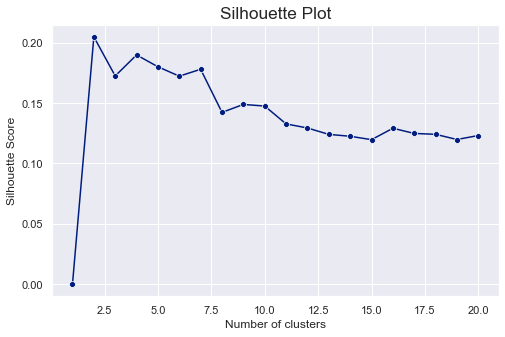

In [7]:
plt.figure(figsize=(8,5))
sns.lineplot(x = n_clusters_interval, y = sil_score, marker = 'o')

plt.title("Silhouette Plot", size = "x-large")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")

plt.show()

From the Elbow plot 7 clusters seem to be the best choice, while by the silhoutte plot 2 clusters have better score.

Total of 7 clusters will be chosen, since it is closer to the cardinality of the quality variable.

In [8]:
k = 7

model = models[k-1]


df_std = pd.DataFrame(df_std, columns = df_red_wine.columns)

df_red_wine['cluster'] = model.labels_
df_std['cluster'] = model.labels_

Text(0, 0.5, 'Variables in standard scale')

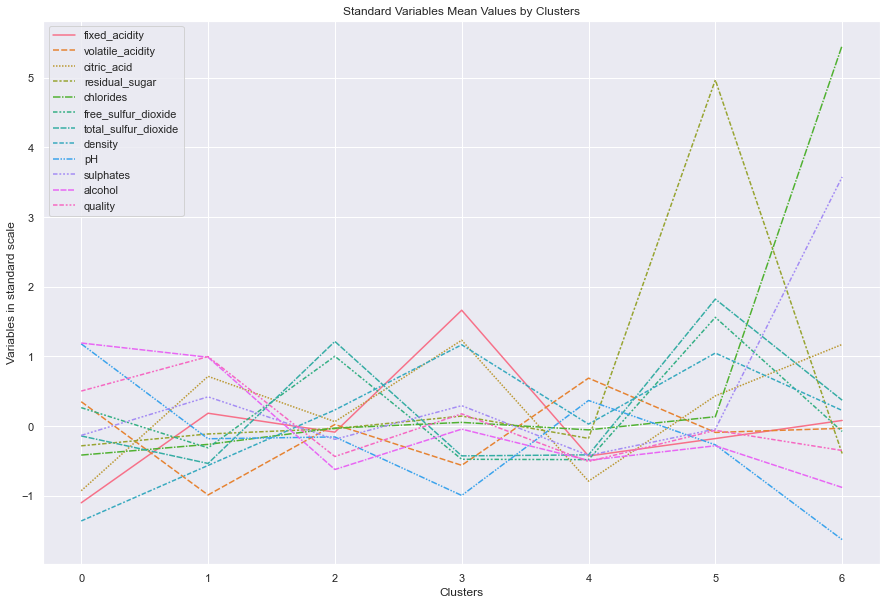

In [9]:
cluster_stats = df_red_wine.groupby('cluster').agg(['count', np.mean])

# Stats will be standardized for better visualization in the same chart
stats_std = df_std.groupby('cluster').agg(['count', np.mean])

plt.figure(figsize=(15,10))

sns.lineplot(data = stats_std.xs('mean', axis = 1, level = 1))

plt.title("Standard Variables Mean Values by Clusters")
plt.xlabel("Clusters")
plt.ylabel("Variables in standard scale")


From the chart above we can observe some characteristics of the clusters

From the chart above we can observe some characteristics of the clusters

 - Cluster 0: Low `density`, `fixed acidity` and `citric acidity`, High `alcohol`
 - Cluster 1: High `quality` and `acohol` with Low `volatile acidity`
 - Cluster 2: High `free sulfur dioxide` and `total sulfur dioxide`, but lower than cluster 5
 - Cluster 3: High `density`, `fixed acidity` and `citric acidity`
 - Cluster 4: High `volatile acidity` and Low `citric acidity`
 - Cluster 5: High `residual sugar`, `free sulfur dioxide` and `total sulfur dioxide`
 - Cluster 6: High `chlorides` and `sulphates`, Low `Ph` and `alcohol`

In [11]:
cluster_stats.xs('mean', axis = 1, level = 1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
cluster,,,,,,,,,,,,
0,6.395808,0.593204,0.090659,2.138323,0.067503,18.640719,42.041916,0.994162,3.492395,0.635629,11.720160,6.035928
1,8.628070,0.348333,0.411579,2.368202,0.075083,12.614035,28.859649,0.995650,3.281316,0.730044,11.499561,6.442982
2,8.156643,0.533269,0.284441,2.471329,0.086594,26.340909,87.351399,0.997139,3.285385,0.625979,9.756410,5.262238
3,11.195238,0.426167,0.512905,2.715238,0.090667,10.900000,32.490476,0.998887,3.155238,0.708429,10.383492,5.766667
4,7.561743,0.655169,0.117530,2.283051,0.085356,10.846247,32.973366,0.996758,3.366513,0.586683,9.898507,5.203390
5,7.996429,0.512500,0.356786,9.237500,0.094679,32.178571,107.642857,0.998664,3.267857,0.651071,10.125000,5.571429
6,8.448148,0.523333,0.501111,1.988889,0.357741,15.074074,59.185185,0.997126,3.057037,1.268519,9.477778,5.333333
